In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import streamlit as st

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data is Already clean as shown Below

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.shape

(1000, 8)

### VISUALIZING THE DATASET 

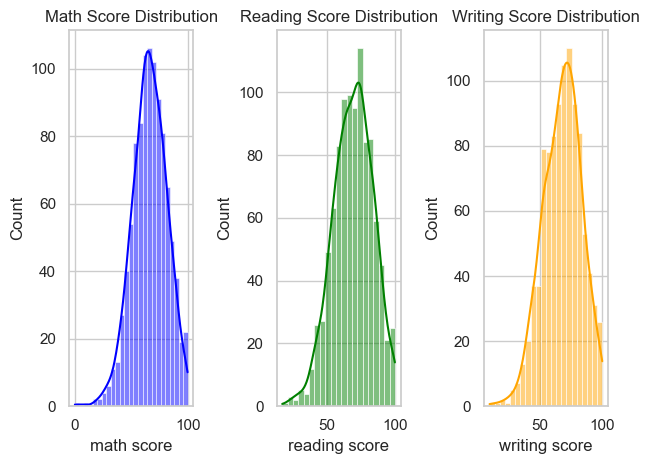

In [16]:
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='orange')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

In [17]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
df.describe(include='object') 


,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### MEAN

In [25]:
df[['math score', 'reading score', 'writing score']].mean()


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

##### MEADIAN

In [26]:
df[['math score', 'reading score', 'writing score']].median()


math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

##### DEVIATION

In [27]:
df[['math score', 'reading score', 'writing score']].std()


math score       15.163080
reading score    14.600192
writing score    15.195657
dtype: float64

### MODEL TRAINING ON DATA

In [29]:
X = df[['reading score', 'writing score']]  
y = df['math score']

### SPLITTING FOR TESTING AND TRAINING 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Model trained successfully')

Model trained successfully


In [34]:
y_pred = model.predict(X_test)


In [35]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 77.24297821278957
R² Score: 0.6825697127424625


### Predicting Math score from reading and writing scores by linear regression 

In [39]:
sample = pd.DataFrame({'reading score': [40], 'writing score': [75]})
predicted_math = model.predict(sample)
print(f"Predicted Math Score: {predicted_math[0]:.2f}")


Predicted Math Score: 51.26


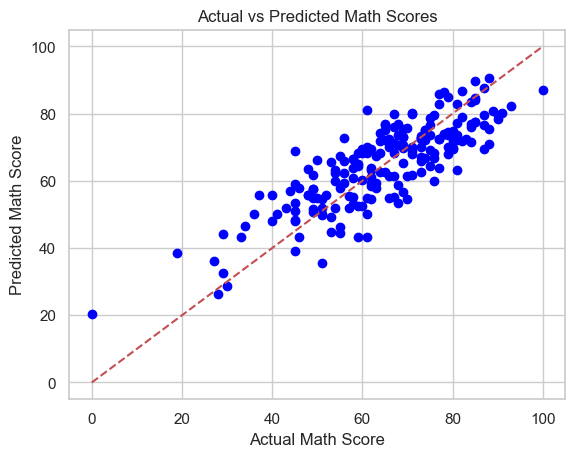

In [40]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()

In [54]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 7.85940588782988
Coefficients: [0.57555997 0.27176146]


In [52]:
reading = 70
writing = 80

intercept = model.intercept_
coefficients = model.coef_

predicted_math = intercept + coefficients[0] * reading + coefficients[1] * writing
print(f"Predicted Math Score: {predicted_math:.2f}")

Predicted Math Score: 69.89


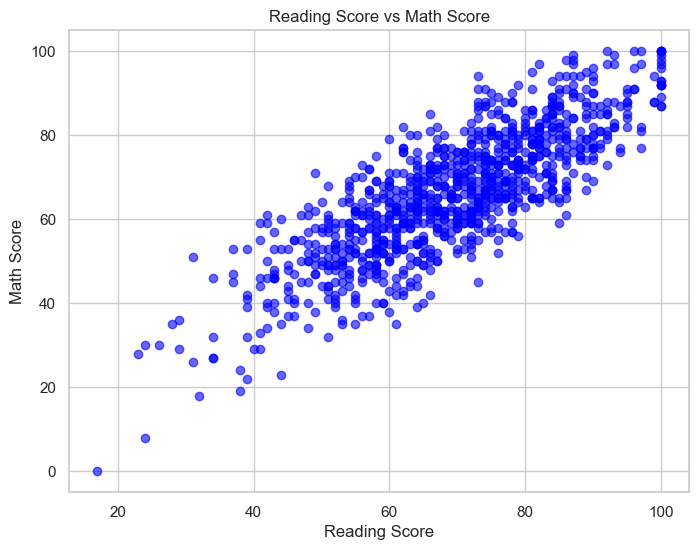

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(df['reading score'], df['math score'], color='blue', alpha=0.6)

plt.title('Reading Score vs Math Score')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.grid(True)
plt.show()

#### WITH REGRESSION LINE

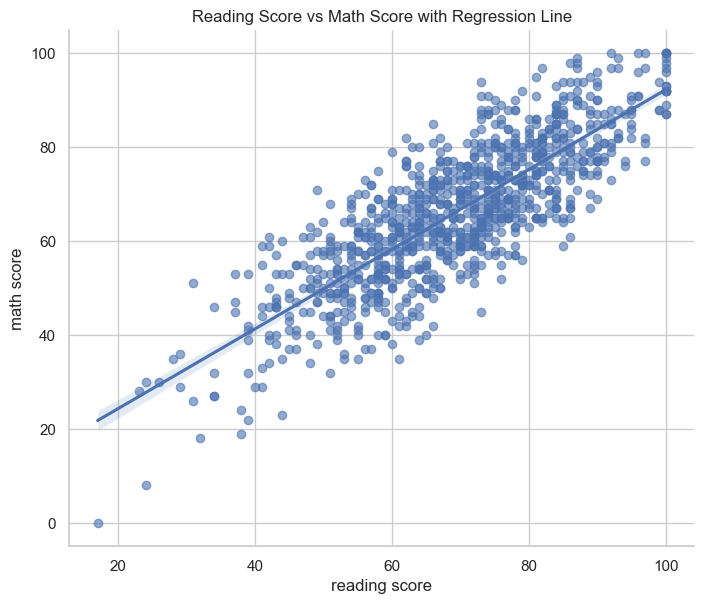

In [57]:
sns.lmplot(data=df, x='reading score', y='math score', height=6, aspect=1.2, scatter_kws={'alpha':0.6})
plt.title('Reading Score vs Math Score with Regression Line')
plt.grid(True)
plt.show()

##### AVERAGE SCORE

In [59]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

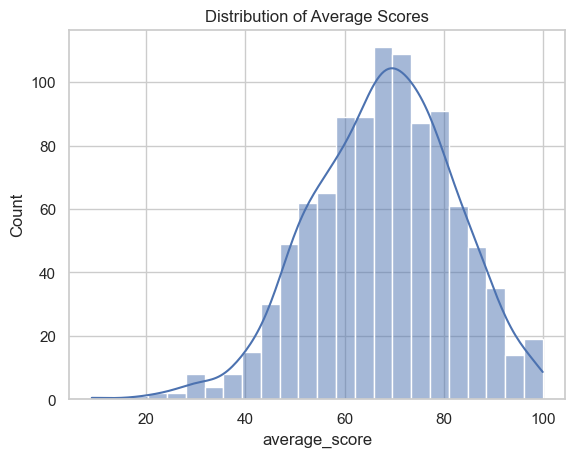

In [60]:
sns.histplot(df['average_score'], kde=True)
plt.title("Distribution of Average Scores")
plt.show()

### CHECKING STUDENT's PERFORMACE

In [65]:
def performance_level(score):
    if score >= 85:
        return 'High'
    elif score >= 60:
        return 'Average'
    else:
        return 'Low'

df['performance'] = df['average_score'].apply(performance_level)


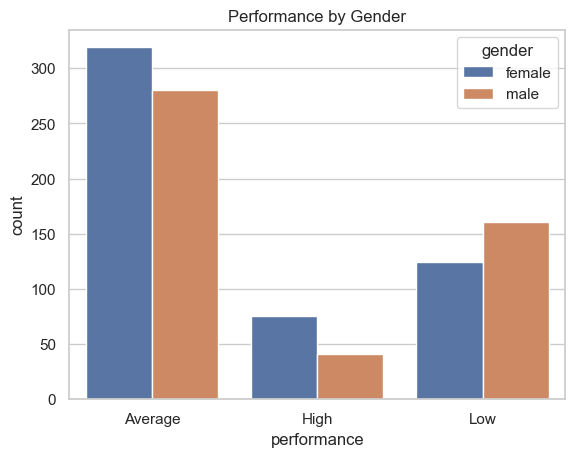

In [66]:
sns.countplot(data=df, x='performance', hue='gender')
plt.title('Performance by Gender')
plt.show()